In [ ]:
! pip install -q kaggle #installing Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir ~/.kaggle #make directory of kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/ #copy json file to kaggle directory

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json #changing module to 600 to get the writing permissions on JSON file

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign #downloading dataset

In [ ]:
!cp /content/gtsrb-german-traffic-sign.zip  /content/drive/MyDrive #copying the downlaoded zip file to my google drive

In [ ]:
!unzip /content/drive/MyDrive/gtsrb-german-traffic-sign.zip -d /content/drive/MyDrive/ #unzipping the file

In [ ]:
#reading train.csv file to know more about our data
import pandas as pd #importing pandas
data =pd.read_csv("/content/drive/MyDrive/Train.csv") #loading the train.csv file
data.head(15) #printing first 15 rows to see the data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [ ]:
data["Width"].value_counts() #checking width column values

34     1327
35     1323
31     1319
33     1316
30     1304
       ... 
126       1
183       1
185       1
196       1
221       1
Name: Width, Length: 187, dtype: int64

In [ ]:
data["Height"].value_counts() #checking height column values

33     1380
31     1368
34     1335
36     1301
35     1300
       ... 
200       1
172       1
138       1
196       1
211       1
Name: Height, Length: 176, dtype: int64

In [ ]:
import os #importing os module
import cv2 #importing cv2 module
import time #importing time
from tqdm import tqdm #importing tqdm
images_dir="/content/drive/MyDrive/Train" #all images path
images_id_data=[] #list intialization for storing images and ids of them
start_time = time.time() #to record process start time
for image_classid in tqdm(os.listdir(images_dir)): # loop to iterate over the class ids
  class_id_images_path=os.path.join(images_dir,image_classid) #using os module to join image directory and images
  for image_info in os.listdir(class_id_images_path):    # loop through images of all ids
    image=cv2.imread(os.path.join(class_id_images_path,image_info))     # loading the imaages
    image=cv2.resize(image,(34,34)) #resizing the image
    images_id_data.append([image,image_classid]) #appending the images and ids to the list
end_time = time.time() #to record the process end time
print("total time took to load all the images is {}".format(end_time-start_time)) #printing total time took to complete the process

100%|██████████| 43/43 [09:59<00:00, 13.93s/it]

total time took to load all the images is 599.1928718090057


In [ ]:
images=[] #to initilaize images list
image_ids=[] #to initilaize id list
for j in range(len(images_id_data)): #loop through the images and ids
  images.append(images_id_data[j][0]) #append images to images list
  image_ids.append(images_id_data[j][1]) #append ids to image_ids list

In [ ]:
import pickle #importing pickle file
file_=open("/content/drive/MyDrive/images_pickle","wb") #opening the images pickle file as write mode
pickle.dump(images,file_) #dumping the images in images list to images pickle file
file_.close() #closing teh file

In [ ]:
file_=open("/content/drive/MyDrive/image_ids_pickle","wb") #opening the imges_id pickle file as write mode
pickle.dump(image_ids,file_) #dumping the images in images list to images pickle file
file_.close()

In [ ]:
import pickle
file = open('/content/drive/MyDrive/images_pickle', 'rb') #opening the images pickle file as read mode
all_images = pickle.load(file) #loading the images from the pickle file
file.close() #closing the file

file = open('/content/drive/MyDrive/image_ids_pickle', 'rb') #opening the images_id pickle file as read mode
all_ids = pickle.load(file) #loading the ids from the pickle file
file.close() #closeing the file

the original image is


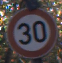

the gray image is


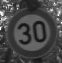

In [ ]:
from google.colab.patches import cv2_imshow as ci #importing cv2_imshow
import cv2 #importing cv module
import numpy as np #importing numpy module
img = cv2.imread('/content/drive/MyDrive/Train/1/00001_00002_00023.png') #loading image from the path using cv2 module
print("the original image is")
ci(img) #displaying the image
Grayimg = cv2.imread('/content/drive/MyDrive/Train/1/00001_00002_00023.png',0) #converting the image to gray
print("the gray image is")
ci(Grayimg)

gaussain noise image is


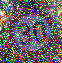

specakle Noise image is


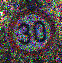

Luminance Dimension


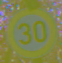

The image with luminance dimesnions b is


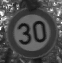

The image with luminance dimesnions b is


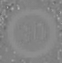

The image with luminance dimesnions b is


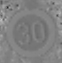

In [ ]:
gauss_noise = np.random.normal(0,1,img.size).reshape(img.shape[0],img.shape[1],img.shape[2]).astype("uint8") #generating guassian noise
img_gauss_noise = cv2.add(img,gauss_noise) #adding guassian noise to image
print("gaussain noise image is")
ci(img_gauss_noise) #displaying the image

print("specakle Noise image is")
img_speckale_noise = img + img * gauss_noise #adding specakle noise to image
ci(img_speckale_noise)#displaying the image

img_luminous= cv2.cvtColor(img, cv2.COLOR_BGR2LAB) #adding luminous intensity noise to image
print("Luminance Dimension")
ci(img_luminous)#displaying the image

img_l, img_a, img_b = cv2.split(img_luminous) #splitting l,a,b in luminous intensity seperately
print("The image with luminance dimesnions b is")
ci(img_l)#displaying the image

print("The image with luminance dimesnions b is")
ci(img_a)#displaying the image

print("The image with luminance dimesnions b is")
ci(img_b)#displaying the image

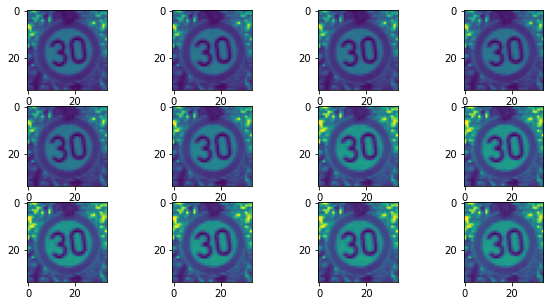

In [ ]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import scipy
import cv2



image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.2,1.8]) #loading image data genrator library with brightness range parameter
image_path = '/content/drive/MyDrive/Train/1/00001_00002_00023.png' #image path

image=cv2.imread(image_path,0) #reading the image
image=cv2.resize(image,(34,34)) #resizing the image
plt.figure(figsize=(10,5))  #figure size
for i in range(12): #looping through the number of images we want
  image=image.reshape(1,34,34,1) #converting image to 4dimesnional as input to image data gnerator requires 4d
  image_datagen.fit(image) #passing the image to data genrator
  aug=image_datagen.flow(image,batch_size= 12) # decidng the batch size and generating the image
  images=aug.next() #generating the next image during augmentation
  image=images[0].astype("uint8") #converting pixel values to int8
  image=image.reshape(34,34) #reshaping the image to 2dimensional
  plt.subplot(3,4,i+1) #subplot
  plt.imshow(image) #displaying the image
plt.show() #displaying teh entire plot

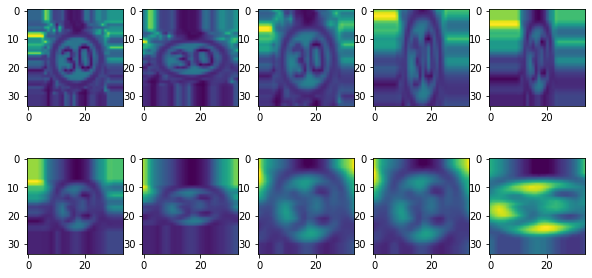

In [ ]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import scipy
import cv2


image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5,1.5])#loading image data genrator library with zoom range parameter
image_path = '/content/drive/MyDrive/Train/1/00001_00002_00023.png'

image=cv2.imread(image_path,0)
image=cv2.resize(image,(34,34))
plt.figure(figsize=(10,5))
for i in range(10):
  image=image.reshape(1,34,34,1)
  image_datagen.fit(image)
  aug=image_datagen.flow(image,batch_size=10)
  images=aug.next()
  image=images[0].astype("uint8")
  image=image.reshape(34,34)
  plt.subplot(2,5,i+1)
  plt.imshow(image)
plt.show()

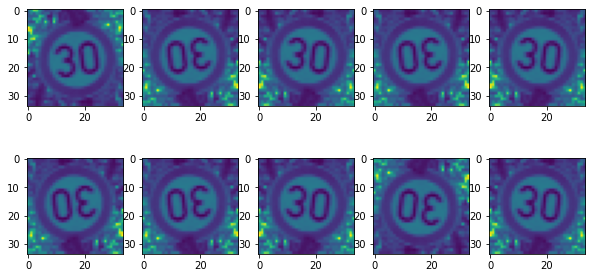

In [ ]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import scipy
import cv2


image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,horizontal_flip = True)#loading image data genrator library with vertical and horizontal flip parameter
image_path = '/content/drive/MyDrive/Train/1/00001_00002_00023.png'

image=cv2.imread(image_path,0)
image=cv2.resize(image,(34,34))
plt.figure(figsize=(10,5))
for i in range(10):
  image=image.reshape(1,34,34,1)
  image_datagen.fit(image)
  aug=image_datagen.flow(image,batch_size=10)
  images=aug.next()
  image=images[0].astype("uint8")
  image=image.reshape(34,34)
  plt.subplot(2,5,i+1)
  plt.imshow(image)
plt.show()

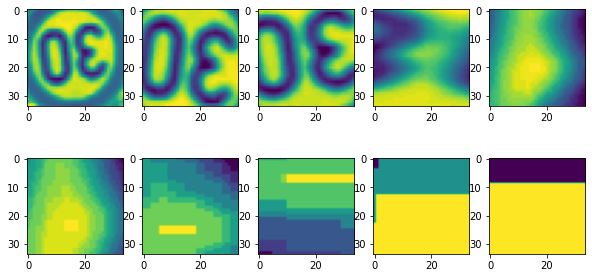

In [ ]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import scipy
import cv2


image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,horizontal_flip = True,brightness_range=[0.3,1.5],zoom_range=[0.2,1])#loading image data genrator library with multiple parameters
image_path = '/content/drive/MyDrive/Train/1/00001_00002_00023.png'

image=cv2.imread(image_path,0)
image=cv2.resize(image,(34,34))
plt.figure(figsize=(10,5))
for i in range(10):
  image=image.reshape(1,34,34,1)
  image_datagen.fit(image)
  aug=image_datagen.flow(image,batch_size=10)
  images=aug.next()
  image=images[0].astype("uint8")
  image=image.reshape(34,34)
  plt.subplot(2,5,i+1)
  plt.imshow(image)
plt.show()

##Splitting the data and loading libraries

In [ ]:
import pickle
file = open('/content/drive/MyDrive/images_pickle', 'rb') #opening the images pickle file as read mode
all_images = pickle.load(file) #loading the images from the pickle file
file.close() #closing the file

file = open('/content/drive/MyDrive/image_ids_pickle', 'rb') #opening the images_id pickle file as read mode
all_ids = pickle.load(file) #loading the ids from the pickle file
file.close() #closeing the file

In [ ]:
import numpy as np
all_images = np.array(all_images) #converting all images to array
all_ids = np.array(all_ids) #converting ids to array

In [ ]:
import numpy as np
random_shuf = np.arange(len(all_images)) #random generator
np.random.shuffle(random_shuf) #random generator
all_images = all_images[random_shuf] #to shuffule images
all_ids = all_ids[random_shuf] #to shuffle ids in same order of images

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_cv, y_tr, y_cv = train_test_split(all_images, all_ids, test_size=0.25, random_state=42, shuffle=True) #splitting the data to train and cv
#standardizing the pixel values
X_tr = X_tr/255
X_cv = X_cv/255

In [ ]:
#importing necessary libraries and modules
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Converting the target labels of train and cv to categorical
y_tr = keras.utils.to_categorical(y_tr, 43)
y_cv= keras.utils.to_categorical(y_cv, 43)

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

#Image data generator library with different parameters initialized for data augmentation.
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

##model 2


In [ ]:
def basic_model_2():
    model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(34,34,3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),#hidden layer 1
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(rate=0.5),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'), #hidden layer2
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(rate=0.5),
    Flatten(), #flattening layer
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),
    Dense(43, activation='softmax') #43 is the number of different categories in target variable
])
    return model

In [ ]:
model_2_aug = basic_model_2()
model_2_aug.summary()

NameError: ignored

In [ ]:
opt = Adam(lr=0.001) #Optimizer we are useing is defined here.
model_2_aug.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #Fixing the loss parameter and optimization parameter.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
aug_2_model = model_2_aug.fit(datagen.flow(X_tr, y_tr, batch_size=32), epochs=30, validation_data=(X_cv, y_cv), callbacks=[es]) #training the model begins here.
model_2_aug.save_weights('/content/drive/MyDrive/aug_model_2_weights.h5')

In [ ]:
model = basic_model_2()
model.summary()

In [ ]:
opt = Adam(lr=0.001) #Optimizer we are using is defined here.
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #Fixing the loss parameter and optimization parameter.
#Augmentation of training data
aug = tf.keras.preprocessing.image.ImageDataGenerator() #Augmentation with no parameters i.e. no augmentation.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
no_aug_2_model = model.fit(aug.flow(X_tr, y_tr, batch_size=32), epochs=30, validation_data=(X_cv, y_cv),callbacks = [es]) #training the model begins here.
model.save_weights('/content/drive/MyDrive/no_aug_model_2_weights.h5')

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(aug_2_model.history['accuracy'])
plt.plot(aug_2_model.history['val_accuracy'])
plt.title('aug_2_model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(aug_2_model.history['loss'])
plt.plot(aug_2_model.history['val_loss'])
plt.title('aug_2_model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(no_aug_2_model.history['accuracy'])
plt.plot(no_aug_2_model.history['val_accuracy'])
plt.title('aug_2_model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(no_aug_2_model.history['loss'])
plt.plot(no_aug_2_model.history['val_loss'])
plt.title('aug_2_model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

#Loading test data

In [ ]:
import pandas as pd
test=pd.read_csv("/content/drive/MyDrive/Test.csv") # reading test.csv file to a variable.
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
from tqdm import tqdm
import cv2
main_path = "/content/drive/MyDrive/"
test_labels = test["ClassId"].values
imgs = test["Path"].values
test_images =[]
#for loop to iterate over all images
for img in tqdm(imgs):
    try: #to catch an errors
        image = cv2.imread(main_path +img)
        resize_image = cv2.resize(image,(34,34))
        test_images.append(resize_image)
    except:
        print("Error in " + img)

100%|██████████| 12630/12630 [00:27<00:00, 451.26it/s]


In [ ]:
#Saving test images to pickle
import pickle
file_=open("/content/drive/MyDrive/test_images","wb")
pickle.dump(test_images,file_)
file_.close()

In [ ]:
#Saving test labels to pickle
import pickle
file_=open("/content/drive/MyDrive/test_labels","wb")
pickle.dump(test_labels,file_)
file_.close()

#Testing the model on test data

In [ ]:
#importing necessary libraries and modules
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Loading the test images from pickle
import pickle
file = open('/content/drive/MyDrive/test_images', 'rb')
test_images = pickle.load(file)
file.close()

file = open('/content/drive/MyDrive/test_labels', 'rb')
test_labels = pickle.load(file)
file.close()

In [ ]:
X_test = np.array(test_images) #converting list to array
X_test = X_test/255 #standardizing the image matrix

In [ ]:
def basic_model_2():
    model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(34,34,3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),#hidden layer 1
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(rate=0.5),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'), #hidden layer2
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(rate=0.5),
    Flatten(), #flattening layer
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),
    Dense(43, activation='softmax') #43 is the number of different categories in target variable
])
    return model

In [ ]:
model = basic_model_2()
model.load_weights("/content/drive/MyDrive/aug_model_2_weights.h5")
pred_test_aug = model.predict(X_test) #predicting the labels of test images.
final_pred_label_aug = []
for pred in pred_test_aug:
  final_pred_label_aug.append(np.argmax(pred))
#Accuracy with the test data
model_aug_accuracy=accuracy_score(test_labels, final_pred_label_aug)*100
print('Test Data accuracy with augmented model: ',model_aug_accuracy)

395/395 [==============================] - 1s 2ms/step
Test Data accuracy with augmented model:  98.27395091053049


In [ ]:
no_aug_model = basic_model_2()
no_aug_model.load_weights("/content/drive/MyDrive/no_aug_model_2_weights.h5")
pred_test_no_aug = no_aug_model.predict(X_test) #predicting the labels of test images.
final_pred_label_no_aug = []
for pred in pred_test_no_aug:
  final_pred_label_no_aug.append(np.argmax(pred))
# Accuracy with the test data
model_no_aug_accuracy=accuracy_score(test_labels, final_pred_label_no_aug)*100 #Calculating accuracy score for predicted using original labels
print('Test Data accuracy with not augmented model: ',model_no_aug_accuracy) #to print accuracy

395/395 [==============================] - 1s 2ms/step
Test Data accuracy with not augmented model:  96.79334916864607


In [ ]:
from sklearn.metrics import classification_report
print("classification report using model trained on data augmentation")
print(classification_report(test_labels,final_pred_label_aug))
print("*"*100)
print("classification report using the model trained without data augmentation")
print(classification_report(test_labels,final_pred_label_no_aug))

classification report using data augmentatin
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      1.00       720
           2       0.98      0.99      0.99       750
           3       0.98      0.99      0.99       450
           4       1.00      0.99      1.00       660
           5       0.99      0.97      0.98       630
           6       0.99      0.93      0.96       150
           7       0.99      1.00      1.00       450
           8       0.99      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      1.00       660
          11       1.00      0.97      0.98       420
          12       1.00      0.97      0.99       690
          13       1.00      0.99      1.00       720
          14       0.97      1.00      0.99       270
          15       0.93      1.00      0.96       210
          16       0.96      1.00   

<Axes: >

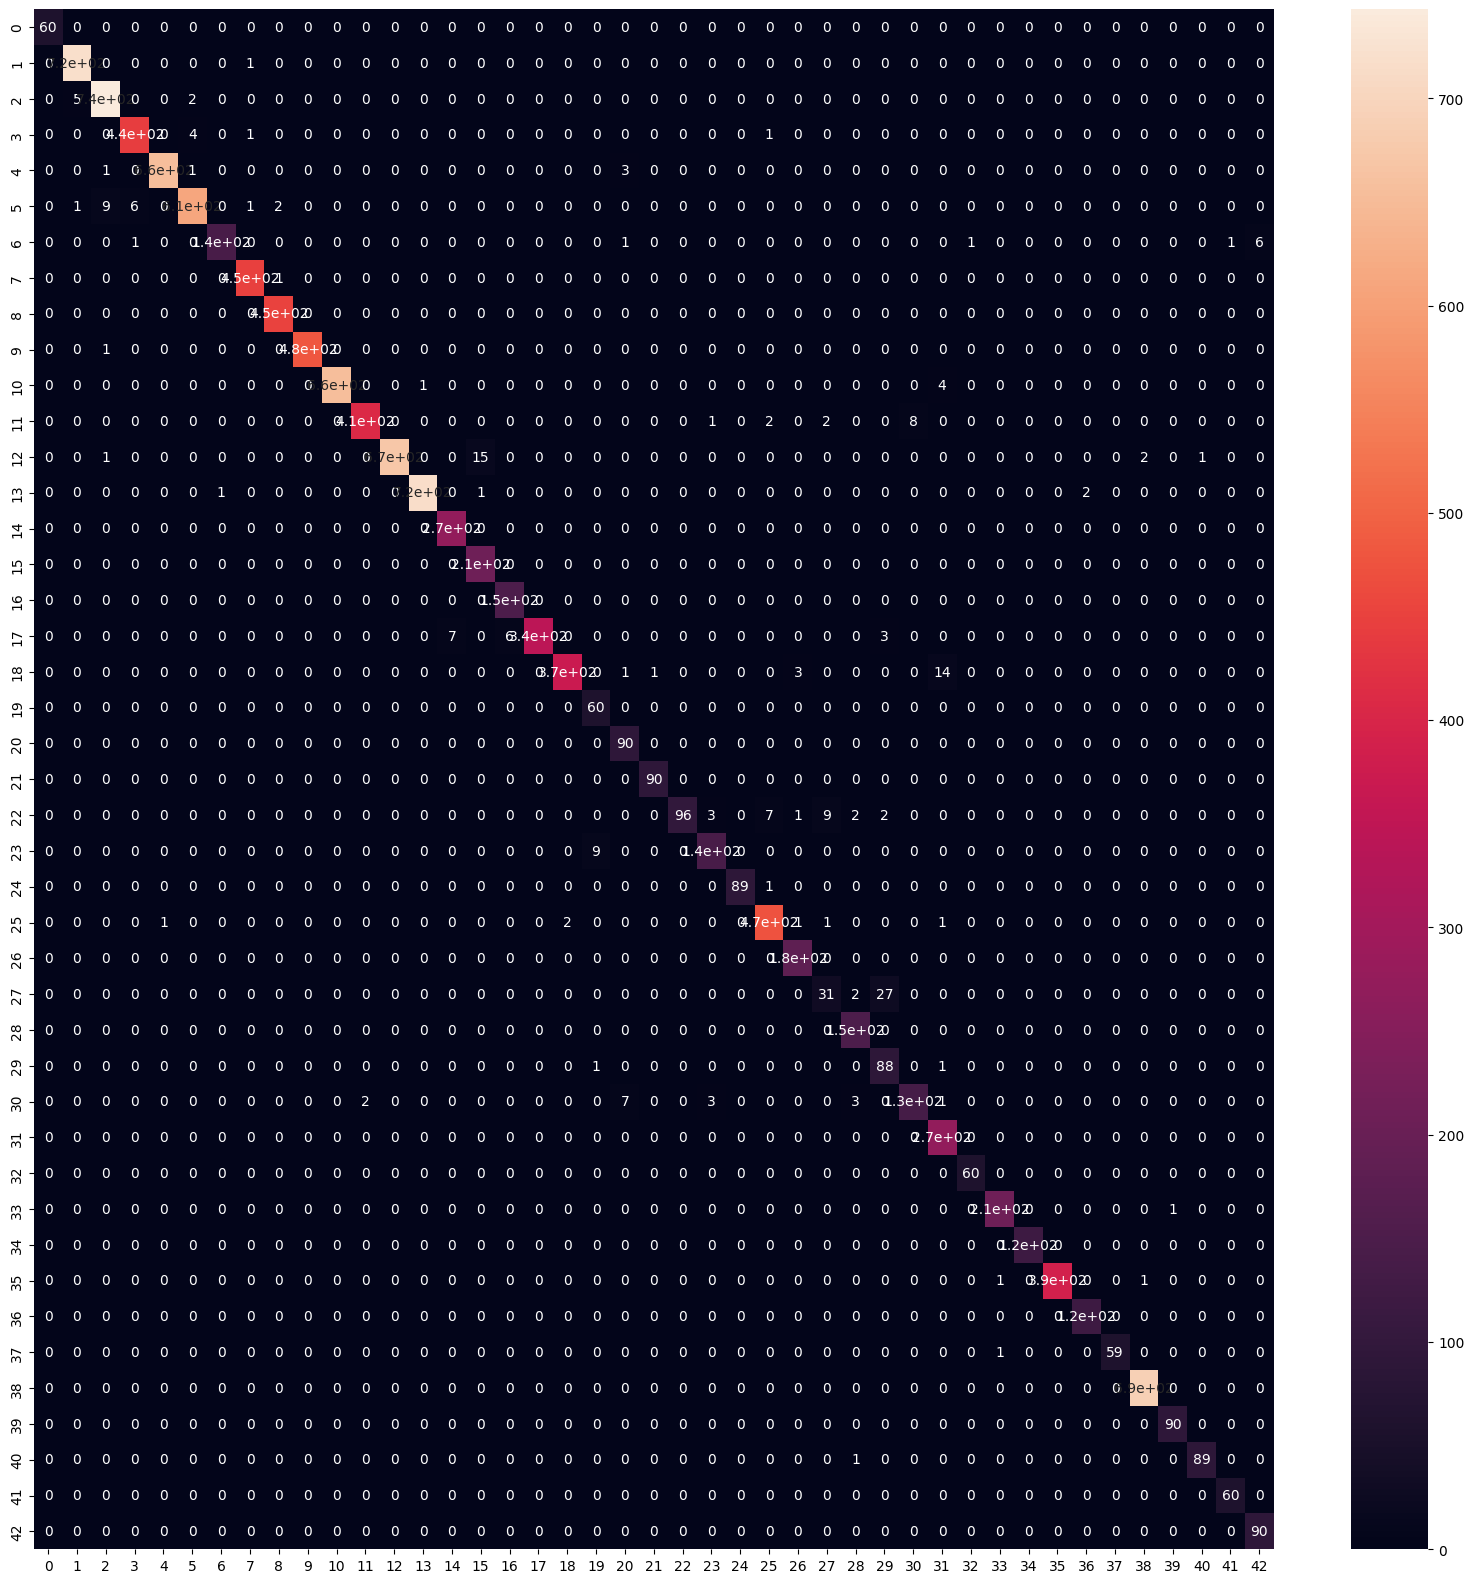

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
con_mat = confusion_matrix(test_labels, final_pred_label_aug)
confusion_matrix_data_frame = pd.DataFrame(con_mat, index = list(range(0,43)),  columns = list(range(0,43)))
plt.figure(figsize = (30,30))
sns.heatmap(confusion_matrix_data_frame, annot=True)

<Axes: >

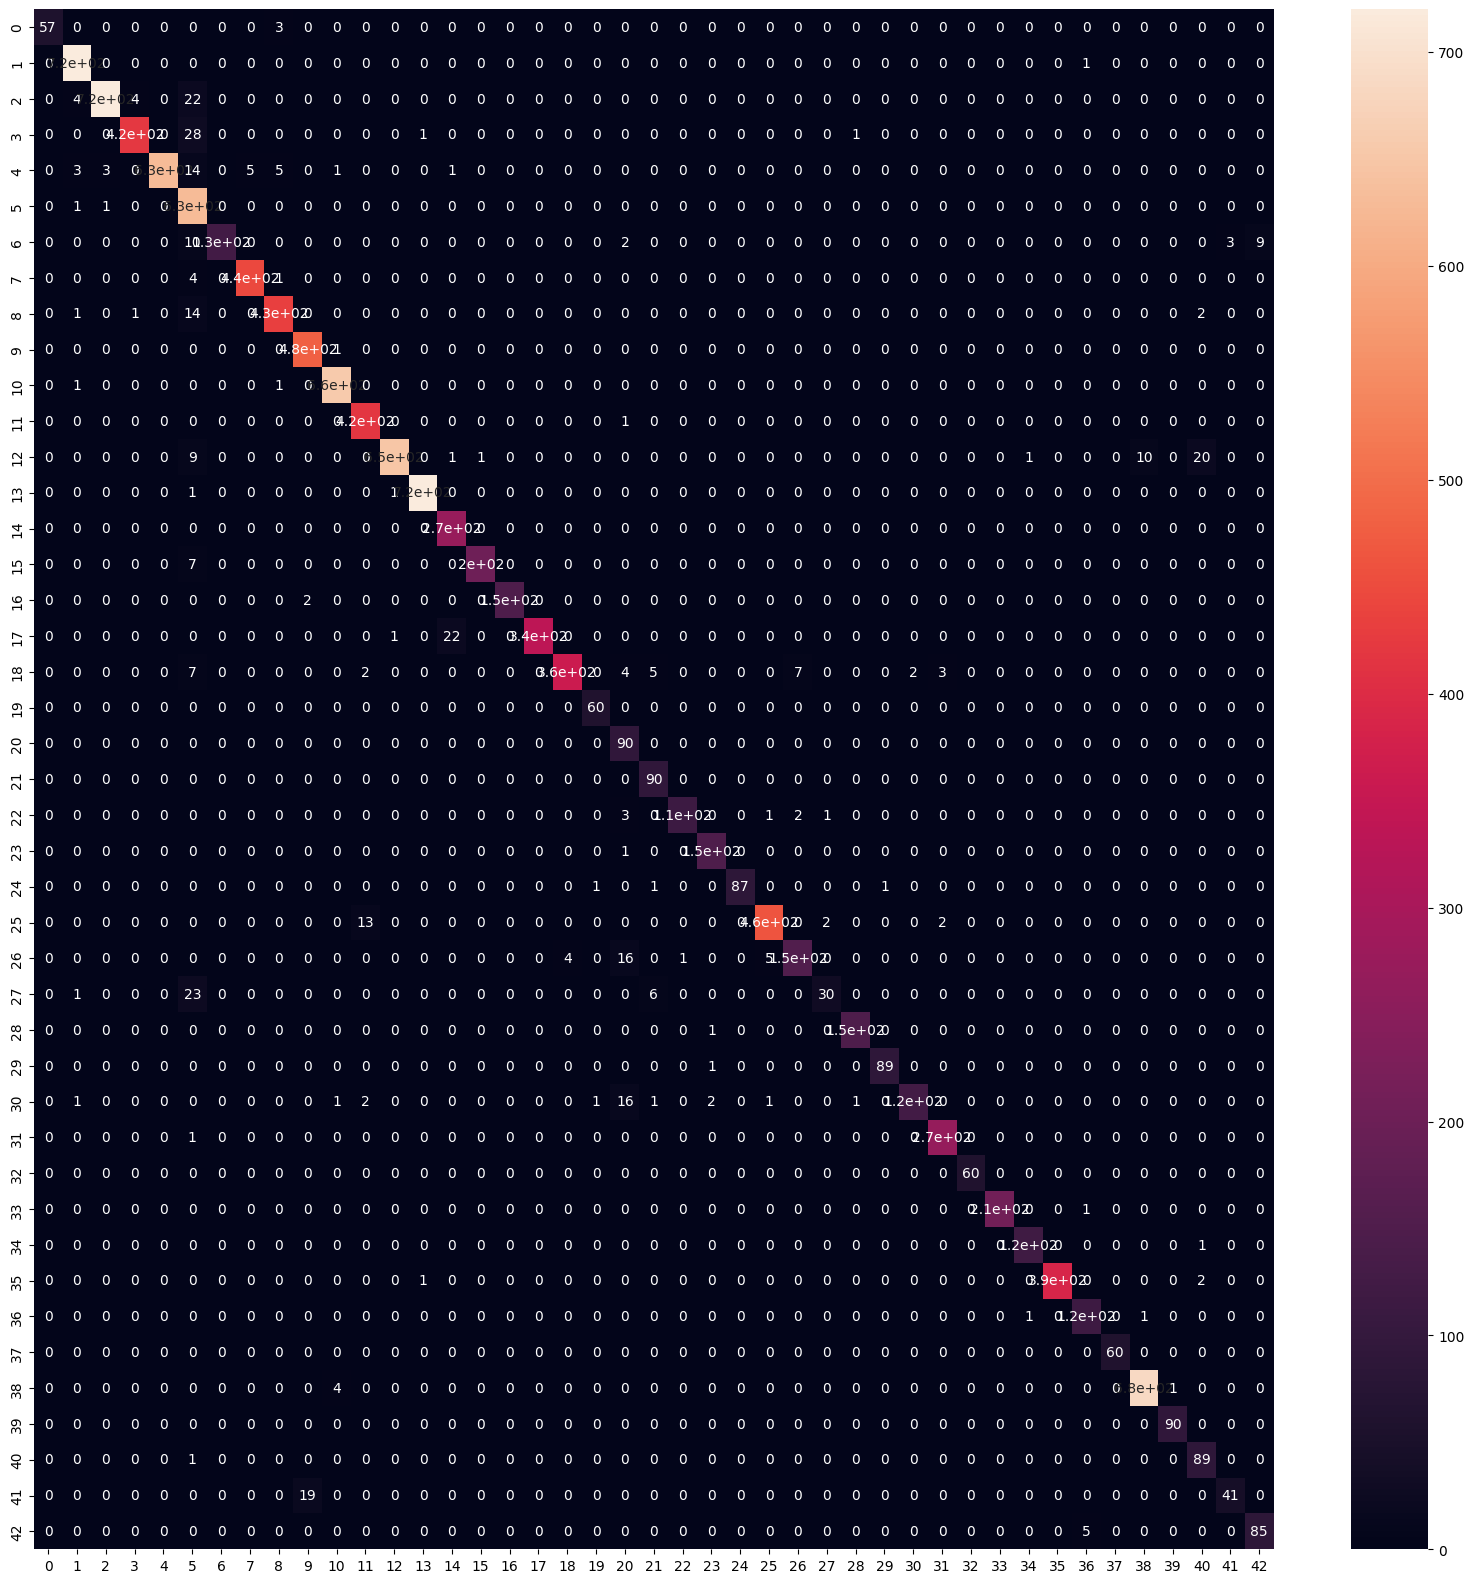

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
con_mat = confusion_matrix(test_labels, final_pred_label_no_aug)
confusion_matrix_data_frame = pd.DataFrame(con_mat, index = list(range(0,43)),  columns = list(range(0,43)))
plt.figure(figsize = (30,30))
sns.heatmap(confusion_matrix_data_frame, annot=True)